In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'notebook'
pio.templates.default = 'plotly'

In [2]:
aapl_df = pd.read_csv('AAPL.csv')
btc_df = pd.read_csv('BTC.csv')
gas_df = pd.read_csv('GAS.csv')
aapl_df['date'] = aapl_df['date'].apply(lambda x: pd.to_datetime(x))
btc_df['date'] = btc_df['date'].apply(lambda x: pd.to_datetime(x))
gas_df['Date'] = gas_df['Date'].apply(lambda x: pd.to_datetime(x))

In [3]:
aapl_df

,date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2019-09-23,53.383072,53.600066,53.066113,53.326996,53.326996,76662000,0.0,0.0
1,2019-09-24,53.890204,54.246174,52.953959,53.073425,53.073425,124763200,0.0,0.0
2,2019-09-25,53.285552,54.004802,52.941773,53.890209,53.890209,87613600,0.0,0.0
3,2019-09-26,53.639082,53.868268,53.353820,53.612263,53.612263,75334000,0.0,0.0
4,2019-09-27,53.770740,53.873145,52.975908,53.351383,53.351383,101408000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
863,2023-02-27,147.710007,149.169998,147.449997,147.919998,147.919998,44998500,0.0,0.0
864,2023-02-28,147.050003,149.080002,146.830002,147.410004,147.410004,50547000,0.0,0.0
865,2023-03-01,146.830002,147.229996,145.009995,145.309998,145.309998,55479000,0.0,0.0
866,2023-03-02,144.380005,146.710007,143.899994,145.910004,145.910004,52279800,0.0,0.0


In [ ]:
fig = px.scatter(data_frame=aapl_df, x='date', y='Adj Close', trendline='ols', title='AAPL')
fig.show()

In [5]:
fig = px.scatter(data_frame=btc_df, x='date', y='Close', trendline='ols', title='BTC')
fig.show()


In [6]:
fig = px.scatter(data_frame=gas_df, x='Date', y='Close', trendline='ols', title='GAS(N.NG)')
fig.show()


In [7]:
# на основе Close извлеките логарифмическую доходность BTC task1, ответ – мю и сигма
# проверьте распределение получившихся данных BTC task2, ответ yes/no 
# возмонжо попробуйте их (BTC) нормализовать task3, ответ – mu и sigma
# попробуйте предположить по подвыборке размером 634 дней среднее значение для доходностей (BTC) на уровне 90 95 99 – task 4, ответ – val + [a;b]
# проверьте корреляцию доходностей BTC & AAPL – task5, ответ – yes/no
# проверьте гипотезу о равенствен средних и дисперсии доходностей BTC & AAPL & GAS – task6, ответ – yes/no

In [8]:
import math

In [9]:
#1
def log_return(df):
    res_table = [0]
    for i in range(1, df.shape[0] - 1):
        Rlog = math.log(df['Close'][i+1] / df['Close'][i])
        res_table.append(Rlog)
    return pd.DataFrame(res_table)

btc_df['LogReturn'] = log_return(btc_df)
print(btc_df['LogReturn'].mean())
print(btc_df['LogReturn'].std())

0.000769103849202134
0.03850222931804472


In [10]:
btc_df

,date,Open,High,Low,Close,Volume,LogReturn
0,2019-09-23,10028.05,10049.99,9615.77,9702.25,31937.232356,0.000000
1,2019-09-24,9702.20,9794.99,7800.00,8493.14,94007.345203,-0.007456
2,2019-09-25,8497.55,8730.00,8215.64,8430.05,60783.892258,-0.044426
3,2019-09-26,8430.05,8465.99,7750.00,8063.73,67930.853749,0.014060
4,2019-09-27,8063.49,8265.00,7852.15,8177.91,43882.924625,0.002552
...,...,...,...,...,...,...,...
1254,2023-02-28,23492.09,23600.00,23020.97,23141.57,264140.998940,0.020843
1255,2023-03-01,23141.57,24000.00,23020.03,23628.97,315287.417370,-0.006950
1256,2023-03-02,23629.76,23796.93,23195.90,23465.32,239315.452190,-0.048503
1257,2023-03-03,23465.32,23476.95,21971.13,22354.34,319954.197850,-0.000229


<IPython.core.display.Javascript object>


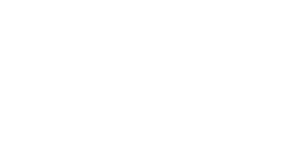

 Проверка с помощью qq графика: 


In [11]:
#2
import statsmodels.api as sm
%matplotlib notebook
import matplotlib.pyplot as plt


fig = sm.qqplot(btc_df['LogReturn'], line='45')
print(' Проверка с помощью qq графика: ')
fig.show()

# Вывод: данные не соответствуют нормальному распределению

<IPython.core.display.Javascript object>


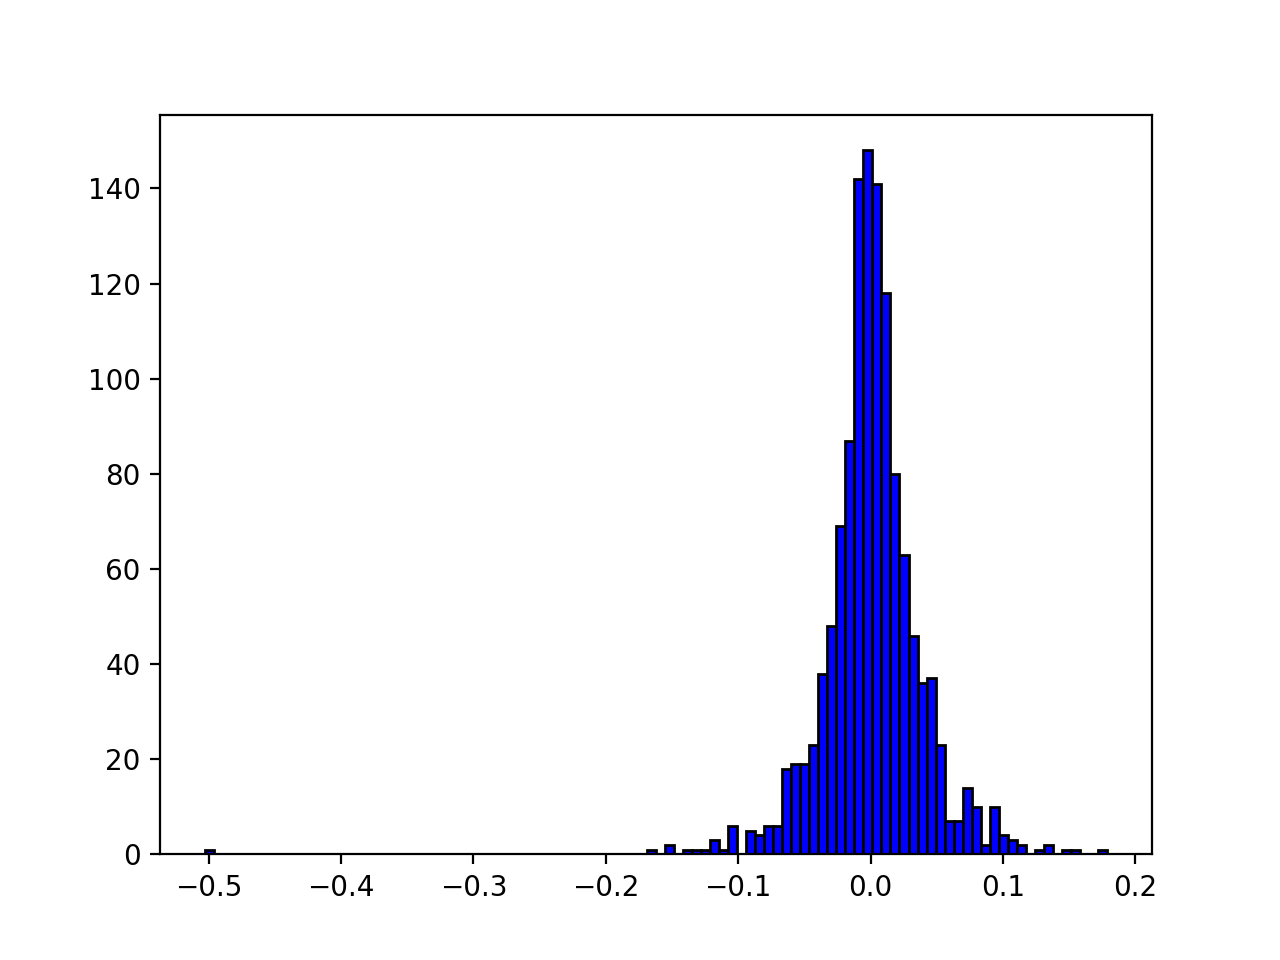


 Проверка с помощью диаграммы: 


In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.hist(btc_df['LogReturn'], color='blue', edgecolor='black', bins=100)
print('\n Проверка с помощью диаграммы: ')
plt.show()

In [13]:
#3
normalized_df = (btc_df['LogReturn'] - btc_df['LogReturn'].mean()) / btc_df['LogReturn'].std()
btc_df['NormLogReturn'] = normalized_df
print(math.ceil(btc_df['NormLogReturn'].mean()))
print(math.ceil(btc_df['NormLogReturn'].std()))

0
1


In [14]:
#4
import numpy as np

s = btc_df.sample(634)['LogReturn']
mu = s.mean()
sigma = s.std()

def f(z):
    return np.array([-z * sigma / (634 ** 0.5), z * sigma / (634 ** 0.5)])

t = np.array([mu, mu])
for z in [1.7, 1.96, 2.6]:
    print(np.sum(t + f(z)) / 2)
    print(t + f(z))

0.0004424438999364043
[-0.00192404  0.00280893]
0.0004424438999364043
[-0.00228597  0.00317086]
0.0004424438999364041
[-0.00317688  0.00406177]


In [15]:
#5 

aapl_df['LogReturn'] = log_return(aapl_df)
print('Корелляция: ', btc_df['LogReturn'].corr(aapl_df['LogReturn'])) 

Корелляция:  0.020927198193511076


In [16]:
#6

gas_df['LogReturn'] = log_return(gas_df)
print(btc_df['LogReturn'].mean(), aapl_df['LogReturn'].mean(), gas_df['LogReturn'].mean())
print(btc_df['LogReturn'].var(), aapl_df['LogReturn'].var(), gas_df['LogReturn'].var())

0.000769103849202134 0.0012062308498441553 0.00021162965256790294
0.0014824216624593025 0.0004957685388488488 0.0022601329069366406


In [17]:
ANSWERS = {
    'tasks' : {
        'task1_mu' : {
            "answer" : 0.000769103849202134
        }, 
        'task1_sigma' : {
            "answer" : 0.03850222931804472
        }, 
        'task2_normal' : {
            'answer' : 'no'
        }, 
        'task3_mu' : {
            "answer" : 0
        }, 
        'task3_sigma' : {
            "answer" : 1
        }, 
        'task4_90' : {
            "answer" : 0.000844912074941786
        }, 
        'task4_90_int' : {
            "answer" : [-0.00190681, 0.00359663]
        }, 
        'task4_95' : {
            "answer" : 0.000844912074941786
        }, 
        'task4_95_int' : {
            "answer" : [-0.00232766, 0.00401748]
        }, 
        'task4_99' : {
            "answer" : 0.000844912074941786
        }, 
        'task4_99_int' : {
            "answer" : [-0.0033636, 0.00505342]
        }, 
        'task5_corr' : {
            "answer" : "no"
        },
        'task6_corr_mu' : {
            "answer" : "no"
        },
        'task6_corr_sigma' : {
            "answer" : "no"
        }
    }
}


In [18]:
import yaml
yaml_result = yaml.dump(ANSWERS)

print(yaml_result)

with open(f"hw03.yaml", "w") as f:
    f.write(yaml_result)

tasks:
  task1_mu:
    answer: 0.000769103849202134
  task1_sigma:
    answer: 0.03850222931804472
  task2_normal:
    answer: 'no'
  task3_mu:
    answer: 0
  task3_sigma:
    answer: 1
  task4_90:
    answer: 0.000844912074941786
  task4_90_int:
    answer:
    - -0.00190681
    - 0.00359663
  task4_95:
    answer: 0.000844912074941786
  task4_95_int:
    answer:
    - -0.00232766
    - 0.00401748
  task4_99:
    answer: 0.000844912074941786
  task4_99_int:
    answer:
    - -0.0033636
    - 0.00505342
  task5_corr:
    answer: 'no'
  task6_corr_mu:
    answer: 'no'
  task6_corr_sigma:
    answer: 'no'

